In [0]:
!pip install -q panda

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

**Upload data and store It**

In [6]:
from google.colab import files
uploaded = files.upload()

In [10]:
df2 = pd.read_csv("HR.csv")
df2.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


**Data Exploration and Visualization**

In [11]:
left = df2[df2.left==1]
left.shape

(2000, 10)

In [12]:
retained = df2[df2.left==0]
retained.shape

(4429, 10)

**Average numbers for all columns**

In [14]:
df2.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.668835,0.719110,3.794536,199.080154,3.098668,0.174757,0.020321
1,0.439955,0.721015,3.877000,207.914000,3.878000,0.052500,0.004000


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

**Impact of salary on employee retention**

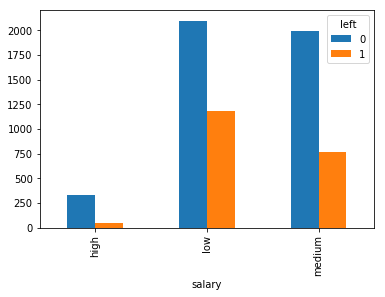

In [16]:
pd.crosstab(df2.salary, df2.left).plot(kind='bar')

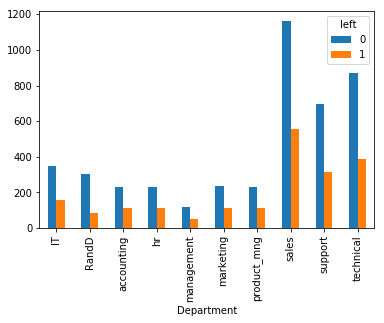

In [17]:
pd.crosstab(df2.Department , df2.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

**From the data analysis so far we can conclude that we will use following variables as dependant variables in our model**
1.Satisfaction Level
2.Average Monthly Hours
3.Promotion Last 5 Years
4.Salary

In [19]:
subdf= df2[['satisfaction_level', 'average_montly_hours' , 'promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Tackle salary dummy variable**

We need convert all the dummy variable or delete varibales.Because we wanna to doing some calculation.So just erase all the dummy data such as Salary in this scenario.

In [0]:
salary_dumm = pd.get_dummies(subdf.salary, prefix = "salary")

In [0]:
df2_with_dummies = pd.concat([subdf,salary_dumm],axis= 'columns')

In [27]:
df2_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [28]:
df2_with_dummies.drop('salary' , axis='columns',inplace=True)
df2_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [30]:
x=df2_with_dummies
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [0]:
y = df2.left

**Now Using the Split the data into train and test**

In [0]:
from sklearn.model_selection import train_test_split
X_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.3)

In [34]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#Fit the data into out model(logis)

logis.fit(X_train , y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
logis.predict(x_test)

array([0, 1, 1, ..., 0, 1, 0])

In [38]:
x_test.head() 

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
4356,0.92,253,0,1,0,0
1300,0.10,284,0,0,1,0
622,0.10,247,0,0,0,1
2396,0.48,183,0,0,1,0
1326,0.10,272,0,0,1,0


**Accuracy  the Model**

we need to find the Accuracy from the data of test sets such as x_test , y_test.

In [39]:
logis.score(x_test , y_test)

0.7231726283048211